<a href="https://colab.research.google.com/github/sofiaweintraub/Analisis-Predictivo/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Examen Final - Analisis Predictivo**
Sofía Weintraub - 62583

El objetivo de este trabajo final para la materia Analisis Predictivo 

## Lectura Base de Datos

In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [501]:
import json
from google.colab import drive

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

drive.mount('/content/drive' , force_remount = True)
with open("/content/drive/My Drive/kaggle.json" , 'r') as f:
  api_token = json.load(f)

  with open('/root/.kaggle/kaggle.json' , 'w') as file:
    json.dump(api_token , file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d jessemostipak/hotel-booking-demand

import zipfile
import os

os.listdir()

for file in os.listdir():
  if file.endswith('.zip'):
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()


mkdir: cannot create directory ‘/root/.kaggle’: File exists
Mounted at /content/drive
hotel-booking-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [502]:
base = pd.read_csv("hotel_bookings.csv")

## Análisis Exploratorio de Datos

In [503]:
base.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [504]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [505]:
#Tamaño
print('Cantidad de Filas y Columnas:',base.shape)

#Columnas
print('Nombre columnas:',base.columns)

Cantidad de Filas y Columnas: (119390, 32)
Nombre columnas: Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [506]:
base.duplicated().sum()

31994

In [507]:
#Elimino los registros duplicados
base.drop_duplicates(inplace = True)

In [508]:
#Chequeo
base.duplicated().sum()

0

In [509]:
base.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Missings

Es importante determinar la prevalencia de los datos faltantes y su aleatoriedad, ya que pueden implicar una reducción del tamaño de la muestra

In [510]:
total = base.isnull().sum()
total1 = base.isnull().sum().sort_values(ascending = False)
percent = (base.isnull().sum() / base.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total1, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
company,82137,0.939826
agent,12193,0.139514
country,452,0.005172
children,4,0.000046
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


## Tratamiento Missings

**Variable *children***

In [511]:
base.children.mode()

0    0.0
dtype: float64

In [512]:
base['children'] = base.children.fillna(0)

**Variable *country***

Los missings de la variable country que figuran vacíos los clasificaré como *Otros*

In [513]:
base['country'] = base.country.fillna('Other')

**Variable *agent***

In [514]:
base.agent.describe()

count    75203.000000
mean        94.138306
std        113.188172
min          1.000000
25%          9.000000
50%         14.000000
75%        240.000000
max        535.000000
Name: agent, dtype: float64

Creo un nuevo ID = 536 para aquellos registros que están vacíos

In [515]:
base['agent'] = base.agent.fillna(536)

**Variable *company***

Más del 93% de sus valores son faltantes, por lo que se decide eliminar esta variable

In [516]:
base = base.drop(columns = 'company' , axis=1)

## Creación de Variables

**Cantidad de Noches Totales**

Se calcula en base a las noches reservadas en la semana (de lunes a viernes) y las noches reservadas que son fin de semana (sabados y domingos)

In [517]:
base['noches_totales'] = base['stays_in_week_nights'] + base['stays_in_weekend_nights']

In [518]:
base.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

**Fecha de Llegada**

En base al anio, mes y dia, se crea una variable que unifica la fecha de llegada del cliente al hotel. 

In [519]:
base['llegada'] = base['arrival_date_day_of_month'].astype('str') + '/' + base['arrival_date_month'].astype('str') + '/' + base['arrival_date_year'].astype('str')

In [520]:
base['llegada'] = pd.to_datetime(base['llegada'], dayfirst= True)

**Familia**

Se considera una familia cuando hay adultos e hijos (ya sean ninios y/o bebes)

In [521]:
base['familia'] = np.where((base['adults'] > 0) & (base['children'] + base['babies']) > 0,1,0)

**Ninios**

In [522]:
base['total_child'] = (base['children'] + base['babies'] > 0).astype(int)

## Transformación de Variables

**Variable *country***

Creación de dummies

In [523]:
dummies = base['country'].str.get_dummies(sep=',')

In [524]:
repetidos = dummies.sum().sort_values(ascending=False)
repetidos = pd.DataFrame(repetidos, columns = ['count']).head(10)
repetidos

,count
PRT,27453
GBR,10433
FRA,8837
ESP,7252
DEU,5387
ITA,3066
IRL,3016
BEL,2081
BRA,1995
NLD,1911


Estos 10 países son los más visitados, por lo tanto, trabajaré unicamente con estos para el armado del modelo



In [525]:
dummies = dummies[['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']]
dummies['PRT'] = dummies['PRT'].astype(int)
dummies['GBR'] = dummies['GBR'].astype(int)
dummies['FRA'] = dummies['FRA'].astype(int)
dummies['ESP'] = dummies['ESP'].astype(int)
dummies['DEU'] = dummies['DEU'].astype(int)
dummies['ITA'] = dummies['ITA'].astype(int)
dummies['IRL'] = dummies['IRL'].astype(int)
dummies['BEL'] = dummies['BEL'].astype(int)
dummies['BRA'] = dummies['BRA'].astype(int)
dummies['NLD'] = dummies['NLD'].astype(int)

**Agrupo por continente**

In [526]:
europa = ['PRT','GBR','ESP','IRL','FRA','ROU','NOR','POL','DEU','BEL','CHE','GRC','ITA','NLD','DNK','RUS','SWE','EST',
       'CZE','FIN','LUX','SVN','ALB','UKR','SMR','LVA','SRB','AUT','BLR','LTU','TUR','HUN','HRV','GEO','AND','SVK',
       'MKD','BIH','BGR','MLT','ISL','MCO','LIE','MNE']

nortea = ['USA','MEX','PRI','CRI','CUB','HND','NIC','GAB','PAN','SLV','GTM']

suda = ['ARG','BRA','CHL','URY','COL','VEN','SUR','PER','ECU','BOL','PRY','GUY']

asia = ['OMN','CN','IND','CHN','ISR','KOR','ARE','HKG','IRN','CYP','KWT','MDV','KAZ','PAK','IDN','LBN','PHL','AZE','BHR',
     'THA','MYS','ARM','JPN','LKA','JOR','SYR','SGP','SAU','VNM','QAT','UZB','NPL','MAC','TWN','IRQ','KHM','BGD','TJK',
     'TMP','MMR','LAO']

africa = ['MOZ','BWA','MAR','ZAF','AGO','ZMB','ZWE','DZA','TUN','CAF','NGA','SEN','SYC','CMR','MUS','COM','UGA','CIV',
       'BDI','EGY','MWI','MDG','TGO','DJI','STP','ETH','RWA','BEN','TZA','GHA','KEN','GNB','BFA','LBY','MLI','NAM',
       'MRT','SDN','SLE']

oceania = ['AUS', 'NZL','FJI']

otros = ['CYM','CPV','JAM','GIB','JEY','GGY','DOM','PLW','BHS','KNA','IMN','VGB','GLP','UMI','MYT','FRO',
       'BRB','ABW','AIA','DMA','PYF','LCA','ATA','ASM','NCL','KIR','ATF', 'Other' ]

In [527]:
base['continente'] = np.where(base['country'].isin(europa),"Europa", np.where(base['country'].isin(nortea),"Norteamerica",np.where(base['country'].isin(suda),"Sudamerica",np.where(base['country'].isin(asia),"Asia",np.where(base['country'].isin(africa),"Africa",np.where(base['country'].isin(oceania),"Oceania",np.where(base['country'].isin(otros),"Otros",0)))))))

In [528]:
# Agrego las variables binarias al DataFrame
base = pd.concat([base, dummies], axis = 1)

# Elimino la vairable original: country
base = base.drop(columns=['country'])

**Variable *hotel***

In [529]:
base.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [530]:
base.loc[base['hotel'] == "Resort Hotel", 'hotel'] = '1'
base.loc[base['hotel'] == "City Hotel", 'hotel'] = '2'
base['hotel'] = pd.to_numeric(base.hotel,errors='coerce').astype('int16')

**Variable *meal***

In [531]:
base.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [532]:
base.loc[base['meal'] == "BB", 'meal'] = '1'
base.loc[base['meal'] == "FB", 'meal'] = '2'
base.loc[base['meal'] == "HB", 'meal'] = '3'
base.loc[base['meal'] == "SC", 'meal'] = '4'
base.loc[base['meal'] == "Undefined", 'meal'] = '5'

base['meal'] = pd.to_numeric(base.meal,errors='coerce').astype('int16')

**Variable *Market Segment***

In [533]:
base.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [534]:
base.loc[base['market_segment'] == "Direct", 'market_segment'] = '1'
base.loc[base['market_segment'] == "Corporate", 'market_segment'] = '2'
base.loc[base['market_segment'] == "Online TA", 'market_segment'] = '3'
base.loc[base['market_segment'] == "Offline TA/TO", 'market_segment'] = '4'
base.loc[base['market_segment'] == "Complementary", 'market_segment'] = '5'
base.loc[base['market_segment'] == "Groups", 'market_segment'] = '6'
base.loc[base['market_segment'] == "Aviation", 'market_segment'] = '7'
base.loc[base['market_segment'] == "Undefined", 'market_segment'] = '8'

base['market_segment'] = pd.to_numeric(base.market_segment,errors='coerce').astype('int16')

**Variable *Distribution Channel***

In [535]:
base.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [536]:
base.loc[base['distribution_channel'] == "Direct", 'distribution_channel'] = '1'
base.loc[base['distribution_channel'] == "Coroporate", 'distribution_channel'] = '2'
base.loc[base['distribution_channel'] == "TA/TO", 'distribution_channel'] = '3'
base.loc[base['distribution_channel'] == "GDS", 'distribution_channel'] = '4'
base.loc[base['distribution_channel'] == "Undefined", 'distribution_channel'] = '5'
base['distribution_channel'] = pd.to_numeric(base.distribution_channel,errors='coerce').fillna('5').astype('int16')

**Variable *Reserved Room Type***

In [537]:
base.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [538]:
base.loc[base['reserved_room_type'] == "A", 'reserved_room_type'] = '1'
base.loc[base['reserved_room_type'] == "B", 'reserved_room_type'] = '2'
base.loc[base['reserved_room_type'] == "C", 'reserved_room_type'] = '3'
base.loc[base['reserved_room_type'] == "D", 'reserved_room_type'] = '4'
base.loc[base['reserved_room_type'] == "E", 'reserved_room_type'] = '5'
base.loc[base['reserved_room_type'] == "F", 'reserved_room_type'] = '6'
base.loc[base['reserved_room_type'] == "G", 'reserved_room_type'] = '7'
base.loc[base['reserved_room_type'] == "H", 'reserved_room_type'] = '8'
base.loc[base['reserved_room_type'] == "L", 'reserved_room_type'] = '9'
base.loc[base['reserved_room_type'] == "P", 'reserved_room_type'] = '10'

base['reserved_room_type'] = pd.to_numeric(base.reserved_room_type,errors='coerce').astype('int16')

**Variable *Assigned Room Type***

In [539]:
base.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [540]:
base.loc[base['assigned_room_type'] == "A", 'assigned_room_type'] = '1'
base.loc[base['assigned_room_type'] == "B", 'assigned_room_type'] = '2'
base.loc[base['assigned_room_type'] == "C", 'assigned_room_type'] = '3'
base.loc[base['assigned_room_type'] == "D", 'assigned_room_type'] = '4'
base.loc[base['assigned_room_type'] == "E", 'assigned_room_type'] = '5'
base.loc[base['assigned_room_type'] == "F", 'assigned_room_type'] = '6'
base.loc[base['assigned_room_type'] == "G", 'assigned_room_type'] = '7'
base.loc[base['assigned_room_type'] == "H", 'assigned_room_type'] = '8'
base.loc[base['assigned_room_type'] == "I", 'assigned_room_type'] = '9'
base.loc[base['assigned_room_type'] == "K", 'assigned_room_type'] = '10'
base.loc[base['assigned_room_type'] == "L", 'assigned_room_type'] = '11'
base.loc[base['assigned_room_type'] == "P", 'assigned_room_type'] = '12'


base['assigned_room_type'] = pd.to_numeric(base.assigned_room_type,errors='coerce').astype('int16')

**Variable *Deposit Type***

In [541]:
base.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [542]:
base.loc[base['deposit_type'] == "No Deposit", 'deposit_type'] = '1'
base.loc[base['deposit_type'] == "Refundable", 'deposit_type'] = '2'
base.loc[base['deposit_type'] == "Non Refund", 'deposit_type'] = '3'

base['deposit_type'] = pd.to_numeric(base.deposit_type,errors='coerce').astype('int16')

**Variable *Customer Type***

In [543]:
base.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [544]:
base.loc[base['customer_type'] == "Transient", 'customer_type'] = '1'
base.loc[base['customer_type'] == "Contract", 'customer_type'] = '2'
base.loc[base['customer_type'] == "Transient-Party", 'customer_type'] = '3'
base.loc[base['customer_type'] == "Group", 'customer_type'] = '4'

base['customer_type'] = pd.to_numeric(base.customer_type,errors='coerce').astype('int16')

**Variable *Reservation Status***

In [545]:
base.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [546]:
base.loc[base['reservation_status'] == "Check-Out", 'reservation_status'] = '1'
base.loc[base['reservation_status'] == "Canceled", 'reservation_status'] = '2'
base.loc[base['reservation_status'] == "No-Show", 'reservation_status'] = '3'

base['reservation_status'] = pd.to_numeric(base.reservation_status,errors='coerce').astype('int16')

**Variable *Arrival Date Month***

In [547]:
base.loc[base['arrival_date_month'] == "January", 'arrival_date_month'] = '01'
base.loc[base['arrival_date_month'] == "February", 'arrival_date_month'] = '02'
base.loc[base['arrival_date_month'] == "March", 'arrival_date_month'] = '03'
base.loc[base['arrival_date_month'] == "April", 'arrival_date_month'] = '04'
base.loc[base['arrival_date_month'] == "May", 'arrival_date_month'] = '05'
base.loc[base['arrival_date_month'] == "June", 'arrival_date_month'] = '06'
base.loc[base['arrival_date_month'] == "July", 'arrival_date_month'] = '07'
base.loc[base['arrival_date_month'] == "August", 'arrival_date_month'] = '08'
base.loc[base['arrival_date_month'] == "September", 'arrival_date_month'] = '09'
base.loc[base['arrival_date_month'] == "October", 'arrival_date_month'] = '10'
base.loc[base['arrival_date_month'] == "November", 'arrival_date_month'] = '11'
base.loc[base['arrival_date_month'] == "December", 'arrival_date_month'] = '12'

base['arrival_date_month'] = pd.to_numeric(base.arrival_date_month,errors='coerce').astype('int16')

## Outliers

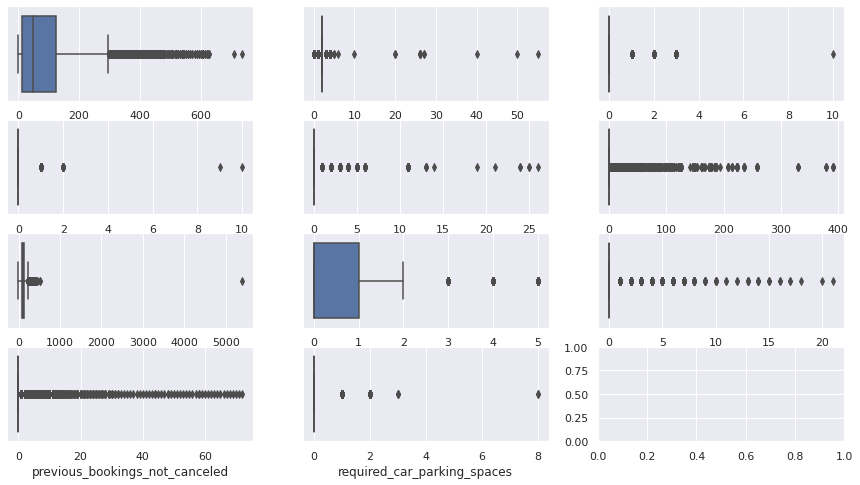

In [548]:
fig, axs = plt.subplots(4,3, figsize=(15, 8))

sb.boxplot(x=base["lead_time"],ax=axs[0,0])
sb.boxplot(x=base["adults"],ax=axs[0,1])
sb.boxplot(x=base["children"],ax=axs[0,2])
sb.boxplot(x=base["babies"],ax=axs[1,0])
sb.boxplot(x=base["previous_cancellations"],ax=axs[1,1])
sb.boxplot(x=base["days_in_waiting_list"],ax=axs[1,2])
sb.boxplot(x=base["adr"],ax=axs[2,0])
sb.boxplot(x=base["total_of_special_requests"],ax=axs[2,1])
sb.boxplot(x=base["booking_changes"],ax=axs[2,2])
sb.boxplot(x=base["previous_bookings_not_canceled"],ax=axs[3,0])
sb.boxplot(x=base["required_car_parking_spaces"],ax=axs[3,1])

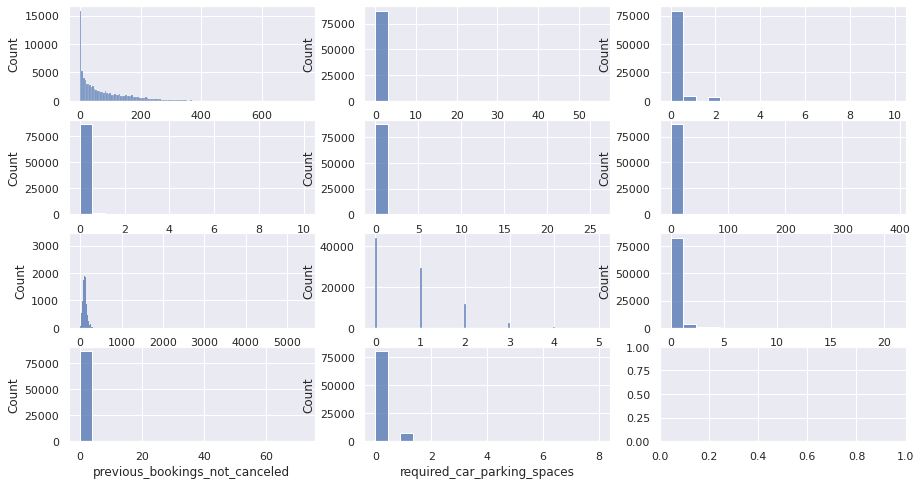

In [549]:
fig, axs = plt.subplots(4,3, figsize=(15, 8))

sb.histplot(x=base["lead_time"],ax=axs[0,0])
sb.histplot(x=base["adults"],ax=axs[0,1])
sb.histplot(x=base["children"],ax=axs[0,2])
sb.histplot(x=base["babies"],ax=axs[1,0])
sb.histplot(x=base["previous_cancellations"],ax=axs[1,1])
sb.histplot(x=base["days_in_waiting_list"],ax=axs[1,2])
sb.histplot(x=base["adr"],ax=axs[2,0])
sb.histplot(x=base["total_of_special_requests"],ax=axs[2,1])
sb.histplot(x=base["booking_changes"],ax=axs[2,2])
sb.histplot(x=base["previous_bookings_not_canceled"],ax=axs[3,0])
sb.histplot(x=base["required_car_parking_spaces"],ax=axs[3,1])

## Tratamiento Outliers

**Lead Time**

In [550]:
lt_i = base.loc[base['lead_time'] == 0].index

In [551]:
base.drop(lt_i , axis=0,inplace = True)

**Adults**

In [552]:
ai = base.loc[base['adults'] < 1].index

In [553]:
base.drop(ai , axis=0,inplace = True)

**Children**

In [554]:
base = base.drop(base[base['children']==10].index)

**Babies**

In [555]:
base.loc[base['babies'] > 2, ['babies']] = 0

**Previous Cancellations**

In [556]:
base.loc[base['previous_cancellations'] > 2, ['previous_cancellations']] = 0

**Days in waiting list**

In [557]:
base.loc[base['days_in_waiting_list'] > 0, ['days_in_waiting_list']] = 0

**ADR**

In [558]:
base = base.drop(base[base['adr'] < 0].index)
base = base.drop(base[base['adr'] == 5400].index)

**Total of special requests**

In [559]:
base.total_of_special_requests.median()

1.0

In [560]:
base.loc[base['total_of_special_requests'] > 3, ['total_of_special_requests']] = 1

**Booking changes**

In [561]:
base.booking_changes.median()

0.0

In [562]:
base.loc[base['booking_changes'] > 4, ['booking_changes']] = 0

**Required car parking spaces**

In [563]:
base = base.drop(base[base['required_car_parking_spaces'] == 8].index)
base.loc[base['required_car_parking_spaces'] > 1, ['required_car_parking_spaces']] = 0

## Graficos Exploratorios

In [ ]:
base['hotelobj'] = np.where((base['hotel'] ==1),"Resort Hotel","City Hotel")

Text(0, 0.5, 'Cantidad')

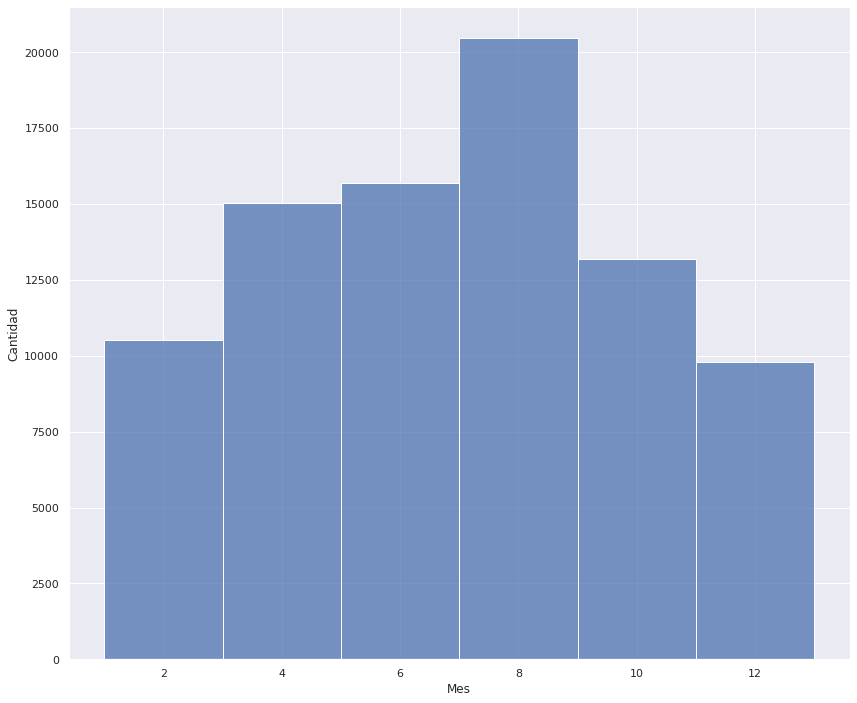

In [ ]:
graph = sb.histplot(data=base, x="arrival_date_month", binwidth = 2)
graph.set_xlabel('Mes', fontsize = 12)
graph.set_ylabel('Cantidad', fontsize = 12)

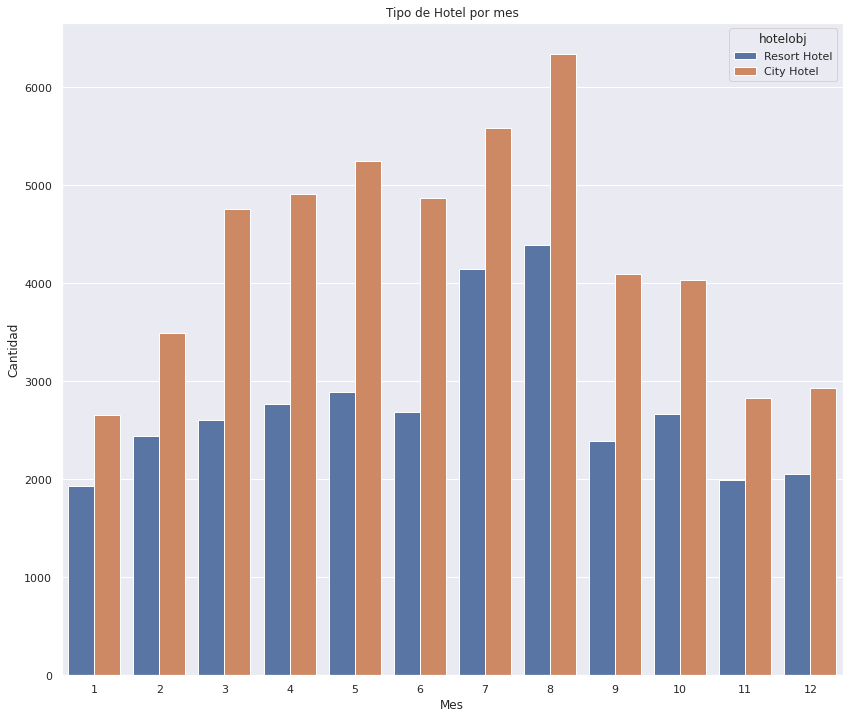

In [ ]:
sb.set(rc={'figure.figsize':(14,12)})
graph = sb.countplot(x = 'arrival_date_month',hue='hotelobj', data=base)
graph.set(title='Tipo de Hotel por mes')
graph.set_xlabel('Mes', fontsize = 12)
graph.set_ylabel('Cantidad', fontsize = 12)
plt.show()

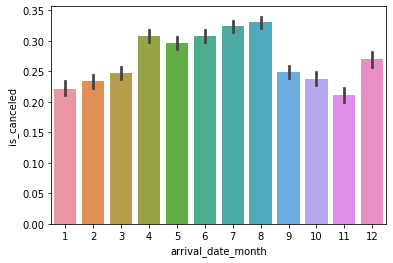

In [ ]:
sb.barplot(x="arrival_date_month", y="is_canceled", data=base)

Claro está que quienes viajan, eligen hacerlo principalmente en Agosto. 

Ahora me pregunto si será mas determinante la epoca del anio dependiendo de quien viaja: Importa que sea una familia, por ejemplo?

In [ ]:
base['es_familia'] = np.where((base['familia'] == 1),1,0)

In [ ]:
data_familia = base[base['es_familia'] == 1]
data_nofamilia = base[base['es_familia'] == 0]

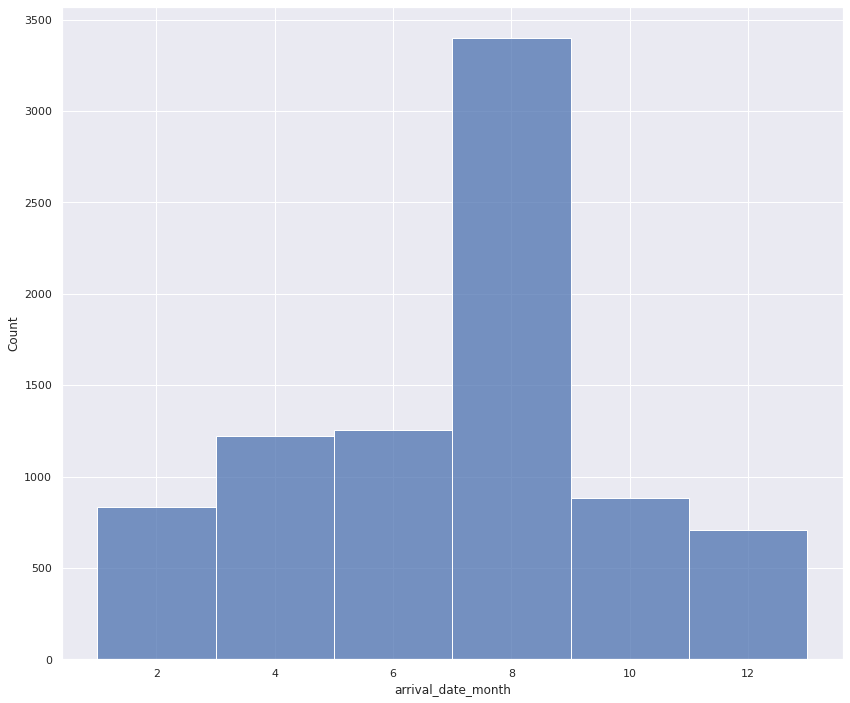

In [ ]:
sb.histplot(data=data_familia, x="arrival_date_month", binwidth = 2)

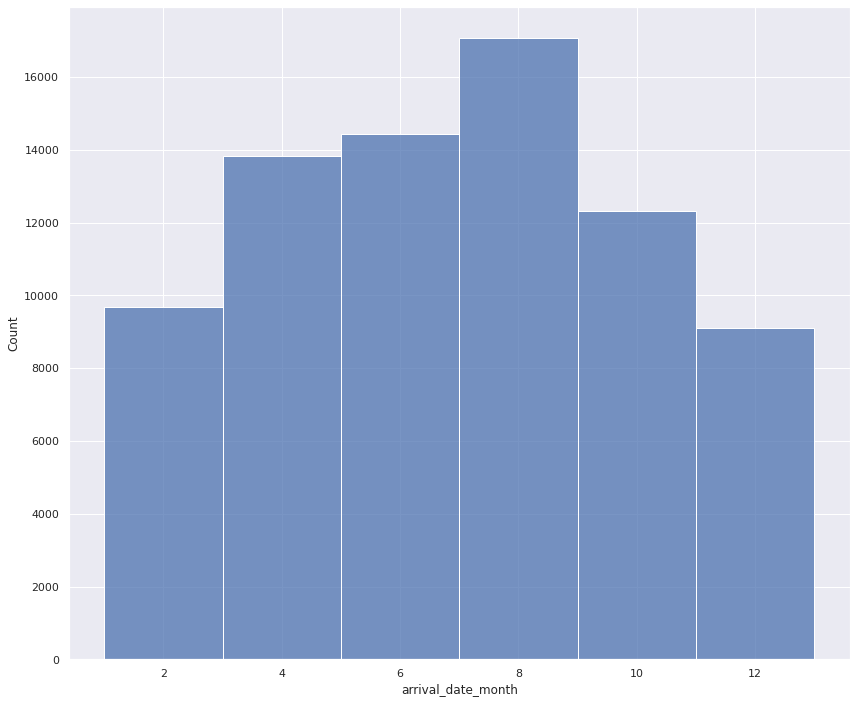

In [ ]:
sb.histplot(data=data_nofamilia, x="arrival_date_month", binwidth = 2)

Se observa que las familias que viajan lo hacen principalmente (y con una diferencia notoria) en Agosto.

Mientras que aquellos que no viajan en familia lo hacen de una forma mas pareja a lo largo del anio. Aunque, se observa que Agosto tambien es el mes mas elegido por ellos para viajar.

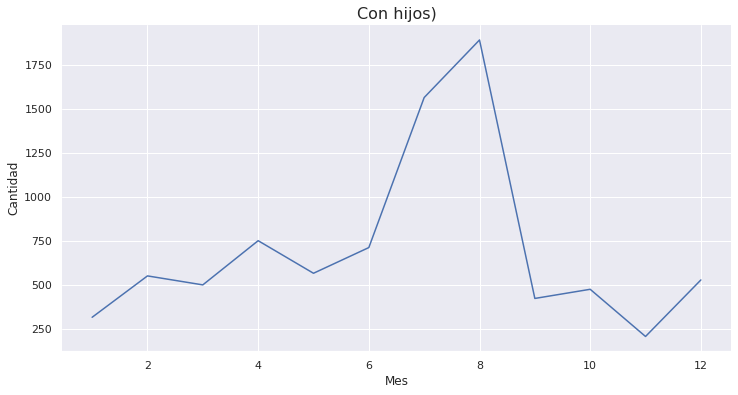

In [ ]:
#Como es el comportamiento entre los meses, de las personas que viajan con hijos
cm = base[base['total_child'] == 1].groupby(['arrival_date_month'], as_index=False).size()

cm.rename(columns={"arrival_date_month": "Mes", "size": "Cantidad"}, inplace=True)

plt.figure(figsize=(12,6))
sb.lineplot(
    data=cm,
    x='Mes', y='Cantidad'
)
plt.title('Con hijos)', fontsize = 16)
sb.despine(left=True)

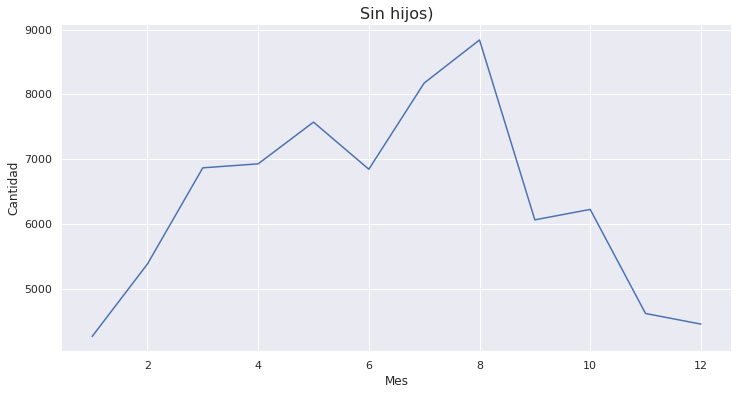

In [ ]:
#Como es el comportamiento entre los meses, de las personas que viajan sin hijos
cm = base[base['total_child'] == 0].groupby(['arrival_date_month'], as_index=False).size()

cm.rename(columns={"arrival_date_month": "Mes", "size": "Cantidad"}, inplace=True)

plt.figure(figsize=(12,6))
sb.lineplot(
    data=cm,
    x='Mes', y='Cantidad'
)
plt.title('Sin hijos)', fontsize = 16)
sb.despine(left=True)

Ya sea en familia, o no, se puede observar un comportamiento similar dado que en ambos casos se observa un pico en Agosto. 

In [ ]:
def season(x):
    if x in [12,1,2]:
        return "Winter"
    if x in[3,4,5]:
        return "Spring"
    if x in[6,7,8]:
        return "Summer"
    if x in[9,10,11]:
        return "Autum"

In [ ]:
base['season']=base['arrival_date_month'].apply(season)

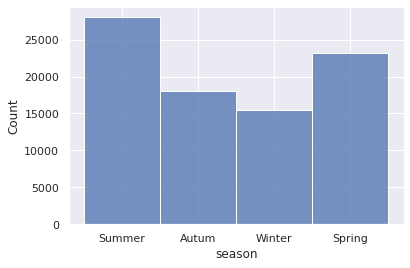

In [ ]:
sb.histplot(data=base, x="season", binwidth = 2)

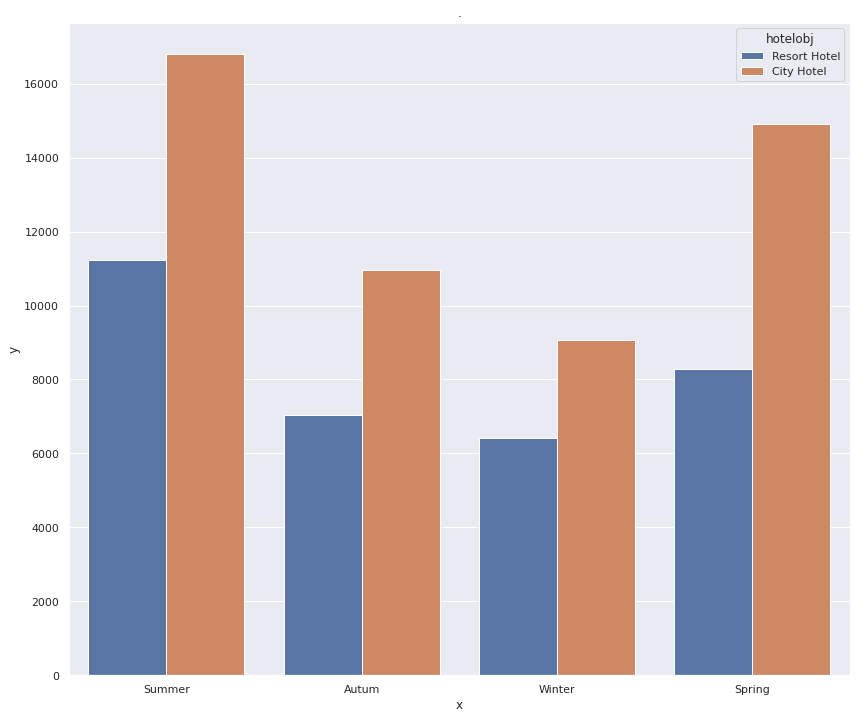

In [ ]:
sb.set(rc={'figure.figsize':(14,12)})
graph = sb.countplot(x = 'season',hue='hotelobj', data=base)
graph.set(title='.')
graph.set_xlabel('x', fontsize = 12)
graph.set_ylabel('y', fontsize = 12)
plt.show()

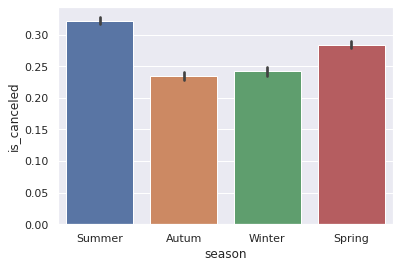

In [ ]:
sb.barplot(x="season", y="is_canceled", data=base)

Al hacer esta division por estacion del anio, me pregunto: como varia el precio de la reserva en funcion a cada estacion?

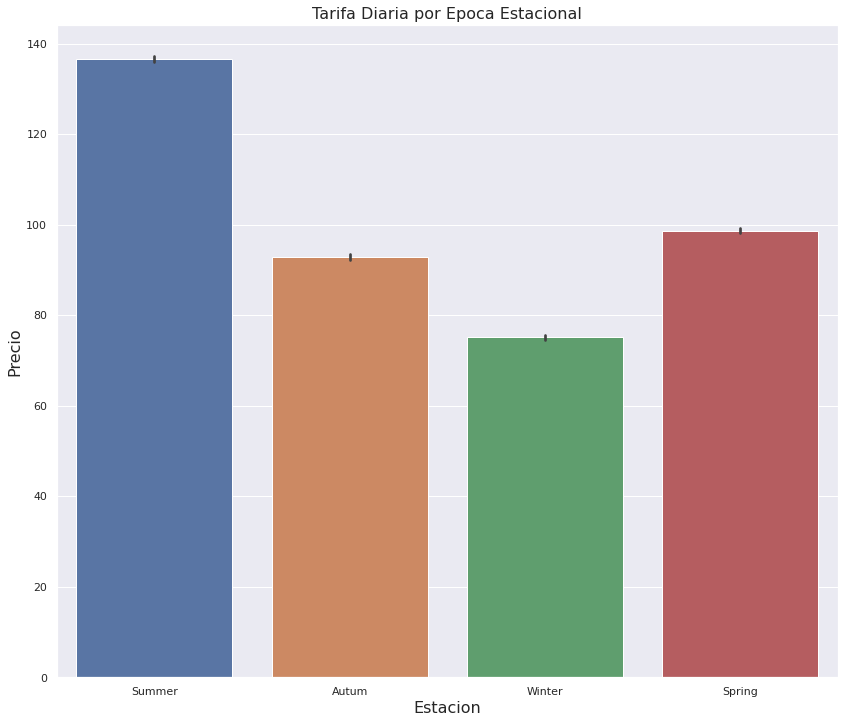

In [ ]:
sb.barplot(data = base , x='season' , y ='adr')
plt.title("Tarifa Diaria por Epoca Estacional", fontsize=16)
plt.xlabel("Estacion", fontsize=16)
plt.ylabel("Precio", fontsize=16)
plt.show()

Toma sentido entonces que los precios más altos se encuentran en verano. No es casualidad que verano sea también la época del anio mas solicitada para viajar.

**Zona** (Continente y País)

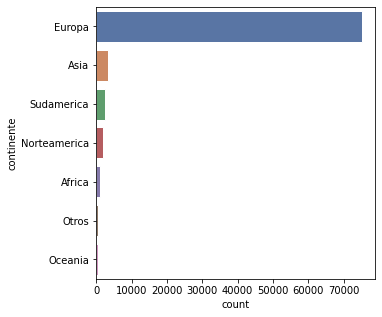

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sb.set_theme(style="darkgrid")
ax = sb.countplot(y="continente", data=base, order = base['continente'].value_counts().index)

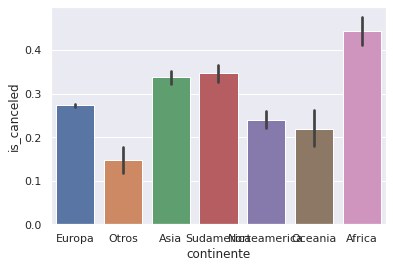

In [ ]:
sb.barplot(x="continente", y="is_canceled", data=base)

De dónde viene la mayoría de los viajeros?

In [ ]:
# codigo

Qué tipo de hotel eligen de acuerdo a su país de origen?

In [ ]:
#codigo (dispersion)

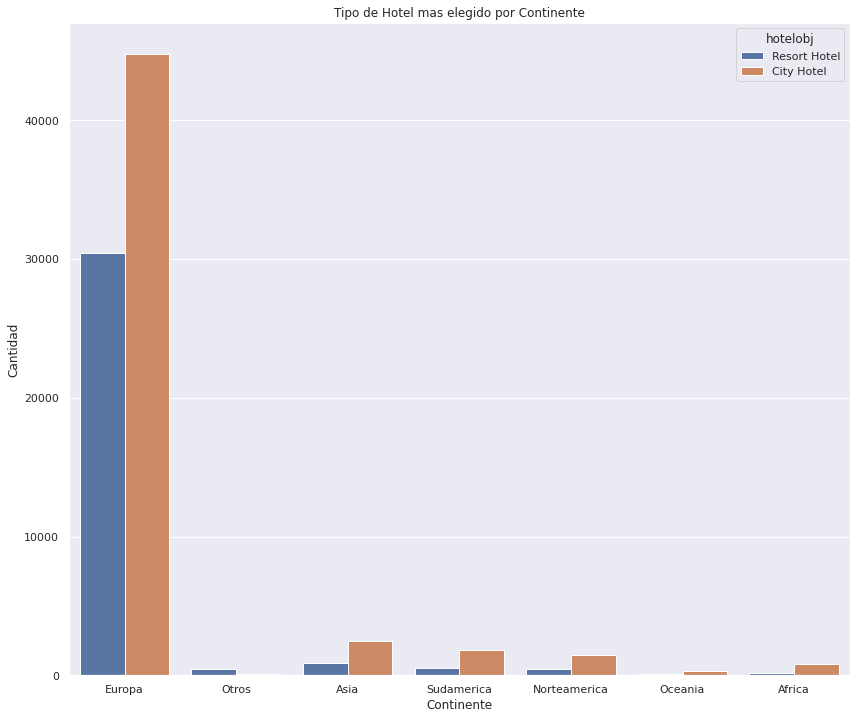

In [ ]:
sb.set(rc={'figure.figsize':(14,12)})
graph = sb.countplot(x = 'continente',hue='hotelobj', data=base)
graph.set(title='Tipo de Hotel mas elegido por Continente')
graph.set_xlabel('Continente', fontsize = 12)
graph.set_ylabel('Cantidad', fontsize = 12)
plt.show()

Se puede observar un comportamiento similar entre los diferentes continentes a la hora de elegir el tipo de hotel para la estadia. Excepto en la agrupacion "otros", que predomina el Resort. A diferencia del resto, en donde todos eligen por sobre el Resort, el hotel en la ciudad. 

## Correlacion

In [564]:
base.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,PRT,GBR,FRA,ESP,DEU,ITA,IRL,BEL,BRA,NLD
hotel,1.000000,0.063589,-0.054688,0.085704,-0.029046,-0.029333,-0.008619,-0.188274,-0.248462,0.004247,...,-0.182099,-0.143692,0.160974,-0.055671,0.115955,0.101326,-0.106983,0.064112,0.058090,0.044493
is_canceled,0.063589,1.000000,0.159417,0.084274,-0.001905,-0.004109,0.004275,0.042035,0.061779,0.072042,...,0.151139,-0.080327,-0.065580,-0.013129,-0.052320,0.030695,-0.028466,-0.030893,0.030209,-0.034210
lead_time,-0.054688,0.159417,1.000000,0.133320,0.106205,0.101157,0.008933,0.208979,0.281622,0.126939,...,-0.084106,0.151497,-0.033386,-0.106743,0.067956,0.001286,0.068659,0.020827,-0.001870,-0.004422
arrival_date_year,0.085704,0.084274,0.133320,1.000000,-0.496844,-0.511672,-0.010886,-0.003089,-0.007157,0.035953,...,-0.177852,0.056875,0.032828,-0.033209,0.051421,0.010066,0.018889,0.031944,0.040240,0.015588
arrival_date_month,-0.029046,-0.001905,0.106205,-0.496844,1.000000,0.994925,-0.002461,0.022200,0.029790,0.021568,...,0.030099,-0.008720,-0.011747,0.025448,-0.018154,-0.001199,-0.001132,-0.003561,-0.017059,-0.011889
arrival_date_week_number,-0.029333,-0.004109,0.101157,-0.511672,0.994925,1.000000,0.091841,0.021916,0.025941,0.019082,...,0.032208,-0.009893,-0.012838,0.024893,-0.017823,-0.000729,-0.002186,-0.003752,-0.016754,-0.011097
arrival_date_day_of_month,-0.008619,0.004275,0.008933,-0.010886,-0.002461,0.091841,1.000000,-0.019760,-0.031316,-0.001238,...,0.009060,-0.002716,-0.017426,-0.000770,0.002073,0.006287,-0.004259,0.000016,0.004945,0.003932
stays_in_weekend_nights,-0.188274,0.042035,0.208979,-0.003089,0.022200,0.021916,-0.019760,1.000000,0.546399,0.079020,...,-0.101279,0.133899,-0.004051,-0.053962,0.011682,-0.014125,0.080912,0.005710,0.001575,-0.001171
stays_in_week_nights,-0.248462,0.061779,0.281622,-0.007157,0.029790,0.025941,-0.031316,0.546399,1.000000,0.085539,...,-0.089622,0.153835,-0.012661,-0.056385,0.006013,-0.026052,0.098422,-0.002967,-0.014002,-0.002632
adults,0.004247,0.072042,0.126939,0.035953,0.021568,0.019082,-0.001238,0.079020,0.085539,1.000000,...,-0.109505,0.020579,0.044329,0.034725,0.010275,0.026282,0.020544,0.021883,0.030033,0.001642


In [565]:
corr = base.corr(method = 'spearman')["is_canceled"]
corr.abs().sort_values(ascending=False)[1:]

reservation_status                0.997773
lead_time                         0.191412
required_car_parking_spaces       0.188392
deposit_type                      0.156144
PRT                               0.151139
total_of_special_requests         0.148921
previous_cancellations            0.141410
customer_type                     0.140202
adr                               0.134103
booking_changes                   0.126191
agent                             0.112991
previous_bookings_not_canceled    0.097778
arrival_date_year                 0.083640
GBR                               0.080327
adults                            0.078473
is_repeated_guest                 0.076179
noches_totales                    0.072095
stays_in_week_nights              0.067735
FRA                               0.065580
assigned_room_type                0.064310
hotel                             0.063589
children                          0.057355
DEU                               0.052320
total_child

## Split

In [596]:
from sklearn.model_selection import train_test_split

In [597]:
cols_seleccionadas = ['reservation_status', 'lead_time', 'required_car_parking_spaces', 'deposit_type', 'PRT',
                      'total_of_special_requests', 'previous_cancellations', 'customer_type', 'adr', 
                      'booking_changes', 'agent', 'previous_bookings_not_canceled', 'arrival_date_year', 'GBR', 'adults', 
                      'is_repeated_guest', 'noches_totales', 'stays_in_week_nights', 'FRA', 'assigned_room_type', 'hotel',
                      'children', 'DEU']

X = base[cols_seleccionadas]
y = base['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [598]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(68940, 23)
(12166, 23)
(68940,)
(12166,)


## Modelos

#### Modelo: Regresion Logistica

In [604]:
from sklearn.linear_model import LogisticRegression

In [605]:
grid={"C":np.logspace(-3,3,7)}
lr = LogisticRegression()
CV_lr = GridSearchCV(lr,grid,cv=10)
CV_lr.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [606]:
CV_lr.best_params_

{'C': 100.0}

In [607]:
lr1 = LogisticRegression(C=100)
lr1.fit(X_train, y_train)
pred_lr = lr1.predict(X_test)
pred_proba_lr1 = lr1.predict_proba(X_test)[:,1]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [608]:
lr1.score(X_test, y_test)

0.9979450928818018

In [619]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score


k_folds = KFold(n_splits=5)

scores = cross_val_score(lr1, X, y, cv = k_folds)
print ("Cross Validation Scores: ", scores)
print ("Average CV Score: ", scores.mean())
print ("Number of CV Scores used in Average: ", len(scores))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

Cross Validation Scores:  [0.97589693 0.99747241 0.9430368  0.99716417 0.99926022]
Average CV Score:  0.9825661069363159
Number of CV Scores used in Average:  5


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



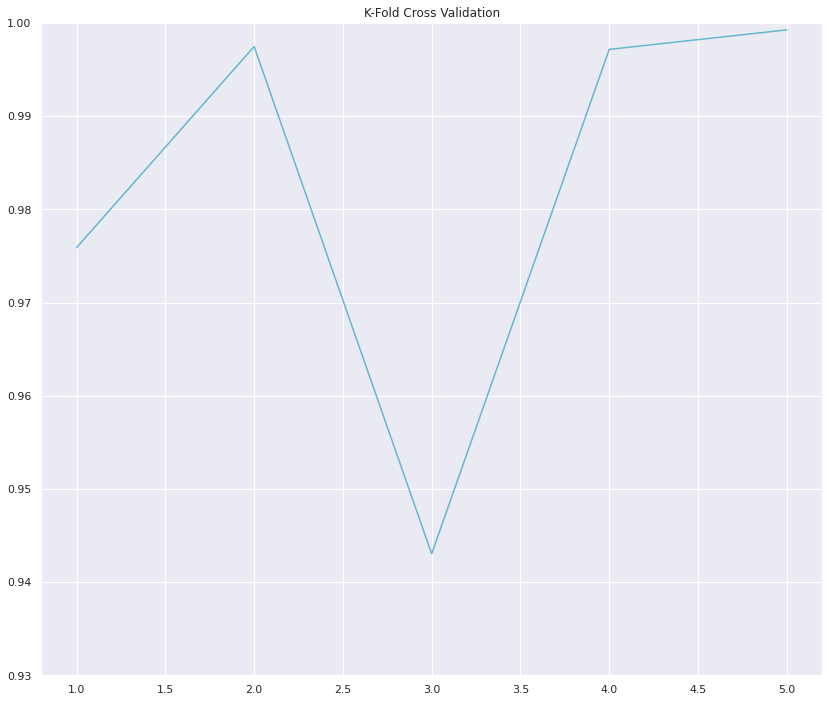

In [621]:
x = np.array([1, 2, 3, 4, 5])
y = scores

plt.title('K-Fold Cross Validation')
plt.plot(x, y, color = 'c')
plt.ylim(0.93, 1)
plt.show()

In [609]:
confusion_matrix = pd.crosstab(y_test,pred_lr, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,8721,1
1,24,3420


In [610]:
roc_auc_score(y_test, pred_proba_lr1)

0.9994948494215836

#### Modelo: Extra Trees

In [599]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [600]:
etc = ExtraTreesClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 150, 200],
    'max_depth' : list(range(1,30,5)),
    'criterion' :['gini', 'entropy'],
    'bootstrap' :[True, False]
}

CV_etc = GridSearchCV(estimator = etc, param_grid=param_grid, cv= 5)
CV_etc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 11, 16, 21, 26],
                         'n_estimators': [100, 150, 200]})

In [601]:
CV_etc.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 11, 'n_estimators': 100}

In [602]:
etc1 = ExtraTreesClassifier(bootstrap = True, random_state=42, max_features='auto', n_estimators= 100, max_depth=11, criterion='gini')
etc1.fit(X_train, y_train)

pred_etc1 = etc1.predict(X_test)
pred_proba_etc1 = etc1.predict_proba(X_test)[:,1]
 
confusion_matrix = pd.crosstab(y_test,pred_etc1, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,8722,0
1,0,3444


In [603]:
etc1.score(X_test, y_test)

1.0

In [581]:
from sklearn.metrics import roc_auc_score

In [582]:
roc_auc_score(y_test, pred_proba_etc1)

1.0

#### Modelo: Random Forest

In [611]:
rfc = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 150, 200],
    'max_depth' : list(range(1,30,5)),
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 11, 16, 21, 26],
                         'n_estimators': [100, 150, 200]})

In [612]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}

In [613]:
rfc1 = RandomForestClassifier(random_state = 42, n_estimators= 100, max_depth=6, criterion='gini')
rfc1.fit(X_train, y_train)

pred_rfc1 = rfc1.predict(X_test)
pred_proba_rfc1 = rfc1.predict_proba(X_test)[:,1]
 
confusion_matrix = pd.crosstab(y_test,pred_rfc1, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,8722,0
1,0,3444


In [614]:
rfc1.score(X_test, y_test)

1.0

In [615]:
roc_auc_score(y_test, pred_proba_rfc1)

1.0

In [588]:
importances = []

# regr3 = RandomForestClassifier(max_depth=16,random_state=42,n_estimators=100,min_samples_leaf=1,max_features=.1)
# fregr3 = regr3.fit(X_train,y_train)

for i in range(len(cols_seleccionadas)):
  importances.append([cols_seleccionadas[i], rfc1.feature_importances_[i]])

importances = pd.DataFrame(importances, columns=["feature", "importance"])
importances.sort_values(by='importance',ascending = False)

,feature,importance
0,reservation_status,0.874854
2,required_car_parking_spaces,0.021140
1,lead_time,0.019400
9,PRT,0.018413
5,agent,0.018366
10,total_of_special_requests,0.011451
3,deposit_type,0.011220
7,customer_type,0.011024
6,previous_cancellations,0.006664
4,adr,0.004744


#### Modelo: KNN